In [2]:
from PIL import Image, ImageDraw, ImageOps, ImageFilter, ImageEnhance
import os
from matplotlib.pyplot import imshow
import random
import matplotlib.pyplot as plt

# Generator

The generator notebook outputs 30px x 30px images with a random hero's artwork in it. These generated images don't have correct fog of war around the heros. They can be used to supplement actual screenshots of heros on maps but they can't  replace them.

In [3]:
# Directory with the hero images
raw_dir = "./character-icons/raw"
raw_images = os.listdir(raw_dir)

In [4]:
# helper for cleaning out directories
def empty_dir(folder):
    for the_file in os.listdir(folder):
        file_path = os.path.join(folder, the_file)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
        except Exception as e:
            print(e)

In [5]:
empty_dir("./character-icons/generated-red")
empty_dir("./character-icons/generated-blue")

# Generating function

mini_icon returns an image of the hero as a red player and also as a blue player.

In [6]:
def mini_icon(file):
    im = Image.open(f"{raw_dir}/{file}")
    converter = ImageEnhance.Color(im)
    im = converter.enhance(random.uniform(0.5, 1.5))
    converter = ImageEnhance.Sharpness(im)
    im = converter.enhance(random.uniform(0.3, 1.5))
    
    mask = Image.open('./character-icons/mask-lg.png').convert('L')
    output = ImageOps.fit(im, mask.size, centering=(0.5, 0.5))
    output.putalpha(mask)

    red_icon = Image.open('./character-icons/bg-red-lg.png')
    converter = ImageEnhance.Color(red_icon)
    red_icon = converter.enhance(random.uniform(0.5, 3))
    red_icon.paste(output, (0,0), mask=output)
    
    blue_icon = Image.open('./character-icons/bg-blue-lg.png')
    converter = ImageEnhance.Color(blue_icon)
    blue_icon = converter.enhance(random.uniform(1, 3))
    blue_icon.paste(output, (0,0), mask=output)
    size = random.randint(11,13)
    sampling = Image.BICUBIC
    return red_icon.resize((size,size), resample=sampling), blue_icon.resize((size,size), resample=sampling)

# Generate 30x30 images with known team  icons

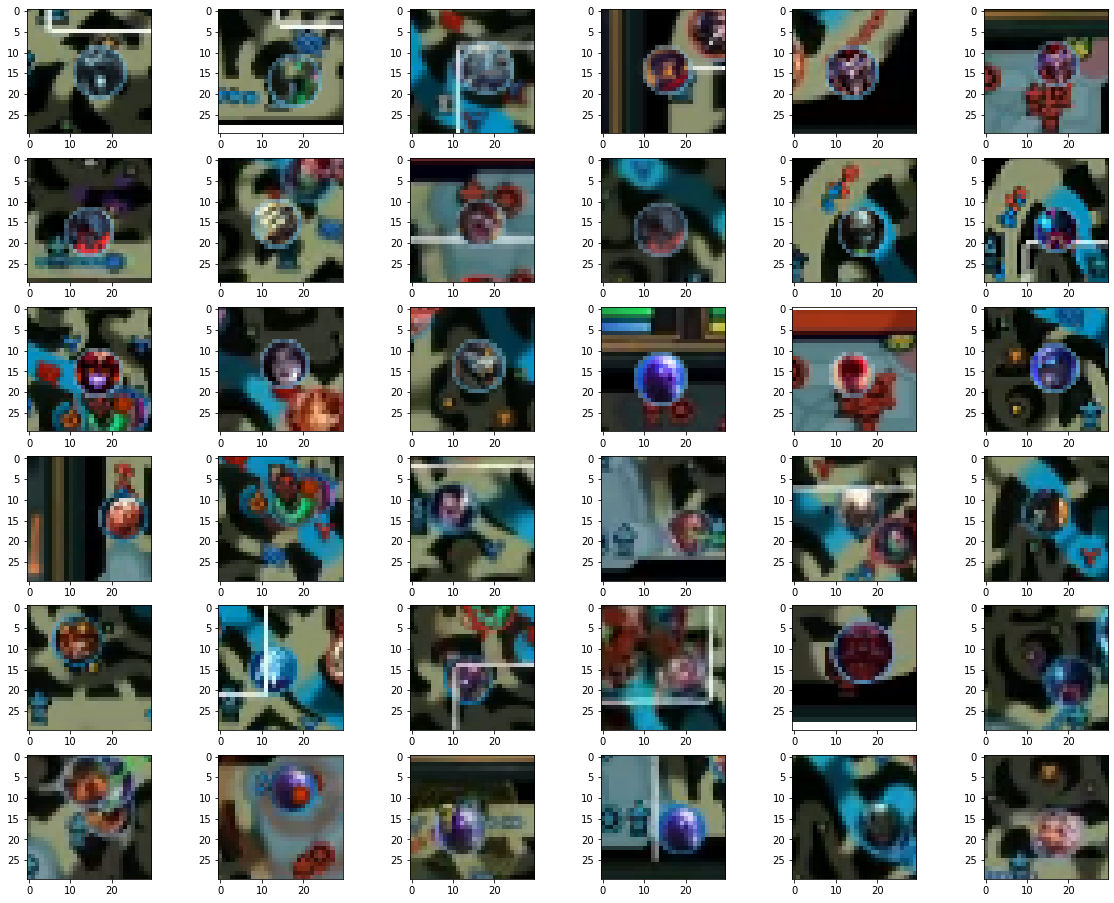

In [7]:
empty_dir("./character-icons/split-red")
empty_dir("./character-icons/split-blue")

# Contains images of maps which do not have heros present on them.
terrain_dir = "./locator/data/terrain"
terrain_files = os.listdir(terrain_dir)
random.shuffle(terrain_files)

# Generate the images
images = []
for i in range(0,8000):
#     Pick two random images which don't contains heros
    t1 = Image.open(f"{terrain_dir}/{random.choice(terrain_files)}").convert("RGBA")
    t2 = Image.open(f"{terrain_dir}/{random.choice(terrain_files)}").convert("RGBA")
#     Generate the hero icons
    red, blue = mini_icon(random.choice(raw_images))
#     Paste the hero images over the map images
    x = random.randint(8, 12)
    y = random.randint(8, 12)
    t1.paste(blue, (x, y), mask=blue)
    t2.paste(red, (x, y), mask=red)
#     Mess up the images a bit to more accurately replicate screenshots taken by a mobile's camera
    converter = ImageEnhance.Sharpness(t1)
    t1 = converter.enhance(random.uniform(0.3, 1.5))
    converter = ImageEnhance.Sharpness(t2)
    t2 = converter.enhance(random.uniform(0.3, 1.5))
#     Save the first few images to be displayed later
    if i < 18:
        images.append(t1)
    t1.save(f"./character-icons/split-blue/{i}.png")
    t2.save(f"./character-icons/split-red/{i}.png")   

# Display a few generated screenshots
actual_dir = "./locator/data/blue"
actual_files = os.listdir(actual_dir)
random.shuffle(actual_files)
for i in range(0,18):
    images.append(Image.open(f"{actual_dir}/{actual_files[i]}"))

f, axarr = plt.subplots(6,6)
f.set_figheight(16)
f.set_figwidth(20)
for i in range(0,6):
    for j in range(0,6):
        axarr[i,j].imshow(images[i*6+j])